# 2019 UK general election

- <https://voteforpolicies.org.uk>

In [1]:
%autosave 120
from psychedelic.jupyter_implicit import *
environment_printout(preferred_device='GeForce')

Autosaving every 120 seconds


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Python version: 3.6.9 (default, Jul  3 2019, 15:36:16) 
[GCC 5.4.0 20160609]
Keras version: 2.2.4
Matplotlib version: 3.0.2
NumPy version: 1.17.3
TensorFlow version: 1.12.0

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 107479040
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16793074887939804578
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"



In [2]:
import ast
import gensim.models.doc2vec
from gensim.models.word2vec import Word2Vec
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from nltk.tokenize import TweetTokenizer
import umap

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (17, 17)

In [4]:
df = pd.DataFrame(columns=['issue'])
df ['issue'] = ['Brexit',
                'Crime',
                'Democracy',
                'Economy',
                'Education',
                'Environment',
                'Equalities & Rights',
                'Foreign Policy / Defence',
                'Health / NHS',
                'Housing',
                'Immigration',
                'Jobs / Work',
                'Tax',
                'Transport',
                'Welfare & Pensions']
df['Conservatives'] = [
    '''
    Implement the current deal and leave the EU by January 31st 2020.
    Keep the UK out of the single market, and any form of customs union.
    Negotiate an EU trade agreement next year, and an implementation period ending in December 2020.
    Guarantee rights of EU citizens in the UK via the EU Settlement Scheme.
    ''',
    '''
    20,000 more police and tougher sentencing for criminals, with powers to stop and search.
    10,000 more prison places.
    Tougher sentencing for the worst offenders, and end automatic halfway release for serious crimes.
    Create a prisoner education service focused on work-based training and skills.
    Pass the Domestic Abuse Bill.
    ''',
    '''
    Support the First Past The Post system.
    Require ID to vote at polling stations, stop postal vote harvesting, and prevent any foreign interference in elections.
    Maintain the voting age at 18.
    Remain committed to local devolution across the UK, with an English Devolution White Paper next year.
    Oppose a Scottish independence referendum.
    ''',
    '''
    Reduce debt by the end of the Parliament.
    £100 billion in additional infrastructure spending.
    Achieve 2.4% of GDP spent on R&D across the economy.
    Deliver two million new high quality jobs in clean growth.
    A new £3 billion National Skills Fund.
    Reduce business rates via a fundamental review of the system.
    ''',
    '''
    £14 billion for schools over three years.
    Raise teachers’ starting salaries to £30,000.
    Continue to build more free schools.
    Offer an ‘arts premium’ to secondary schools to fund enriching activities for all pupils.
    Invest in primary school PE teaching.
    Look at interest rates on loan repayments with a view to reducing students’ debt.
    ''',
    '''
    Net zero emissions by 2050.
    Investment in clean energy solutions and green infrastructure.
    Generate 40 gigawatts from offshore wind by 2030 [currently 8.5 gigawatts].
    Support gas for hydrogen production and nuclear energy.
    £9.2 billion for energy efficiency of homes, schools and hospitals.
    75,000 acres of trees per year by the end of the next Parliament.
    ''',
    '''
    Tackle prejudice, racism and discrimination.
    Boost English language teaching to empower existing migrants and help promote integration.
    Back the National Citizen Service.
    Grant asylum and support to refugees fleeing persecution.
    ''',
    '''
    Develop an independent sanctions regime to tackle human rights abusers.
    Maintain our commitment of 0.7% of Gross National Income on development.
    Do more to help countries receiving aid become self-sufficient.
    Exceed NATO's defence spending target of 2% of GDP, raising it by at least 0.5% per year.
    Maintain our Trident nuclear deterrent.
    ''',
    '''
    An extra £650 million per week [compared to 2018] by the end of the Parliament.
    6,000 more doctors and 6,000 more primary care professionals.
    50,000 more nurses, with students receiving a £5,000-£8,000 annual maintenance grant.
    20 hospital upgrades and 40 new hospitals over the next 10 years.
    Treat mental health with the same urgency as physical health.
    An extra £1 billion every year for social care, and cross-party consensus for long-term reform
    ''',
    '''
    At least a million more homes over the next five years.
    Encourage a new market in long-term fixed rate mortgages which slash the cost of deposits.
    Maintain the Right to Buy for all council tenants.
    Abolish ‘no fault’ evictions and only require one ‘lifetime’ deposit which moves with the tenant.
    End the blight of rough sleeping by the end of the next Parliament.
    ''',
    '''
    An Australian-style points-based system to control immigration.
    End freedom of movement.
    Require migrants to contribute to the NHS, and pay in before they can receive benefits.
    New visas including for NHS professionals, students, and start-ups.
    ''',
    '''
    Increase the National Living Wage to two thirds of average earnings (£10.50 an hour) and extend to everyone over 21.
    Create a single enforcement body and crack down on abuse of employment law.
    Ensure that workers have the right to request a more predictable contract and other reasonable protections.
    ''',
    '''
    No increase in the rate of income tax, VAT or National Insurance.
    Raise the National Insurance threshold to £9,500 next year.
    ''',
    '''
    Build the Northern Powerhouse Rail and invest in the Midlands Rail Hub.
    HS2: consider the findings of the Oakervee review before deciding the outcome.
    Invest in "superbus networks" with lower fares and increased frequency.
    £28.8 billion in strategic and local roads.
    A new £350 million Cycling Infrastructure Fund.
    ''',
    '''
    Continue the roll-out of Universal Credit.
    Extend the entitlement to leave for unpaid carers, the majority of whom are women, to one week.
    A new £1 billion childcare fund, including before and after school, and during school holidays.
    Keep the pensions ‘triple lock’ and the winter fuel payment.
    '''
]
df['Scottish National Party'] = [
    '''
    A second EU referendum with Remain on the ballot paper.
    Revoke Article 50 if the alternative is a ‘no deal’ Brexit.
    Protect Scotland’s place in the single market and customs union.
    Guarantee EU nationals’ right to remain in the UK.
    ''',
    '''
    Refund VAT owed to Scotland’s emergency services.
    Retain EU criminal justice systems.
    Ratify the Istanbul Convention combating violence against women and girls.
    New laws to protect children online.
    ''',
    '''
    Replace First Past the Post with the Single Transferable Vote system.
    Abolish the House of Lords.
    Give 16 and 17-year-olds a vote in all elections.
    Extend the vote to include all those with a right to remain in the UK.
    A referendum on Scottish independence held in 2020 on a date determined by Scottish Parliament not Westminster.
    ''',
    '''
    End austerity, invest in public services and the economy.
    Reverse cuts to the Scottish budget.
    Ensure big corporations and the super-rich pay their taxes.
    A support service for small and medium sized businesses.
    Improved and extended city and region deals and growth deals.
    Give Scotland a fair share of British Business Bank investment.
    ''',
    '''
    No return to tuition fees in Scotland.
    Invest in our children’s future.
    ''',
    '''
    75% reduction in emissions by 2030; net zero carbon by 2040; net zero all emissions by 2045.
    Meet Paris Climate Agreement responsibilities and stick to EU emission standards.
    A Green Energy Deal for investment in renewable energy.
    60 million trees planted annually in the UK by 2025.
    Deploy carbon capture facilities.
    Tax reforms to support greener choices for homes, businesses and transport.
    ''',
    '''
    Legislate for clarity and fairness in the energy supply sector.
    Fine businesses not meeting an Equal Pay Standard.
    Protect and enhance consumer rights.
    Retain the Human Rights Act and remain within ECHR jurisdiction.
    Introduce a right to food.
    Incorporate the UN Convention on the Rights of the Child into domestic law.
    ''',
    '''
    Spend 0.7% of GDP on overseas development assistance.
    Introduce a dedicated Climate Justice Fund.
    Participate in international institutions and work for peace.
    Carry out a Strategic Defence and Security Review.
    Scrap Trident.
    Retain existing Scottish bases and regiments.
    ''',
    '''
    Make UK government spending match Scottish per capita NHS spending.
    Pass an NHS Protection Act to keep the NHS in public hands.
    Put well-being at the heart of policymaking.
    Compensate victims and families for the contaminated blood scandal.
    Replace or amend the Health and Social Care Act 2012.
    Create a supervised drug consumption facility in Glasgow.
    ''',
    '''
    All new homes must use renewable or low carbon heat from 2024.
    Reduce VAT on energy efficiency improvements in homes.
    Solve mortgage difficulties caused by issues with cladding.
    Establish an Ofgem switching database and a free energy provider switching service.
    Use vacant MoD homes to house homeless ex-servicemen.
    ''',
    '''
    Oppose the ‘hostile environment’ of the UK immigration system.
    Scrap the Immigration Skills Charge.
    Take 10,000 people per year under the Syrian Vulnerable Person Resettlement programme.
    End visa fees for children.
    ''',
    '''
    Increase the living wage and extend to 18 to 25-year-olds.
    Extend the Fair Work First approach across the UK.
    Give employment rights for those in the gig economy.
    Increase worker representation on company boards.
    Increase paid leave for parents and promote shared parental leave.
    Greater representation of women and minority communities on public and private sector boards.
    ''',
    '''
    Freeze National Insurance contributions and Value Added Tax.
    Address tax challenges from the digitalisation of the economy.
    ''',
    '''
    Full Scottish public sector control of the Scottish railway system.
    Improve journey times between Scotland and London.
    Reduce VAT on bicycles.
    Incentives for businesses and individuals to use Ultra Low Emission Vehicles.
    ''',
    '''
    End the two-child cap on tax credits and associated 'rape clause'.
    Halt Universal Credit.
    End the punitive benefit sanctions regime.
    Protect the Triple Lock pension guarantee.
    Oppose any increase in the state pension age.
    Support the WASPI campaign.
    '''
]
df['Labour'] = [
    '''
    Rule out a no-deal Brexit.
    Negotiate a new deal, including a UK-wide customs union and close alignment with the Single Market (within three months).
    Put the new deal to a legally binding referendum with Remain as an option (within six months).
    Grant EU nationals the automatic right to continue living and working in the UK.
    ''',
    '''
    Recruit more police officers, police community support officers and police staff, including 2,000 more frontline officers.
    Restore total prison officer numbers to 2010 levels.
    Guarantee a publicly run, locally accountable probation service.
    Rebuild our youth services and guarantee young people’s access to youth workers.
    Restore all early legal aid advice.
    ''',
    '''
    End the hereditary principle in the House of Lords, and replace it with an elected body.
    Reduce the voting age to 16.
    Allow all UK residents to vote, and introduce automatic voter registration.
    Decentralise decision-making and strengthen local democracy
    Oppose a Scottish independence referendum.
    ''',
    '''
    £250 billion for renewable and low-carbon energy and transport, biodiversity and environmental restoration.
    £150 billion to replace, upgrade and expand our schools, hospitals, care homes and council houses.
    A National Investment Bank to loan £250 billion to businesses over 10 years.
    Bring rail, energy, water and mail into public ownership, and create a publicly owned bank.
    3% of GDP to be spent on research and development by 2030.
    Consider a land value tax on commercial landlords as an alternative to business rates.
    ''',
    '''
    Free education for everyone throughout their lives via a National Education Service.
    Reverse cuts to Sure Start and create a new ‘Sure Start Plus’ service.
    Abolish tuition fees and bring back maintenance grants.
    Replace Ofsted, and transfer responsibility for inspections to a new body.
    Bring free schools and academies back under the control of parents, teachers and local communities, and close the tax loopholes enjoyed by private schools.
    30 hours of free childcare for two to four-year-olds.
    ''',
    '''
    Aim for net-zero-carbon energy system within the 2030s.
    Nearly 90% of electricity and 50% of heat from renewable and low-carbon sources by 2030.
    A windfall tax on oil companies.
    Build new nuclear power for energy security.
    Introduce a Climate and Environment Emergency Bill.
    Introduce a new Clean Air Act with a vehicle scrappage scheme and clean air zones.
    ''',
    '''
    Create a new Department for Women and Equalities.
    Retain commitment to the Human Rights Act and Convention on Human Rights.
    Ratify both the Istanbul Convention on preventing domestic abuse, and the ILO Convention on Violence and Harassment at work.
    Close the gender pay gap by 2030 and extend pay-gap reporting to BAME groups.
    Reform the Gender Recognition Act to introduce self-declaration for transgender people.
    ''',
    '''
    Introduce a War Powers Act to ensure that no prime minister can bypass Parliament to commit to conventional military action.
    Rebuild climate expertise within the Foreign Office, putting climate diplomacy at the heart of our foreign policy.
    A foreign aid budget of at least 0.7% of Gross National Income.
    Increase funding for UN peacekeeping operations to £100 million.
    Maintain our NATO commitment to spend 2% of GDP on defence.
    Support the renewal of the Trident nuclear deterrent.
    ''',
    '''
    Reverse privatisation in the NHS in the next Parliament.
    More than £1 billion in public health and recruit 4,500 more health visitors and school nurses.
    Introduce a training bursary for nurses, midwives and allied health professionals.
    £2 billion to modernise hospital facilities for mental health, and end the use of out-of-area placements.
    £845 million on children and adolescent mental health services.
    Build a National Care Service for England.
    ''',
    '''
    150,000 council and social homes per year by the end of 2024, with 100,000 for social rent.
    Upgrade almost all of the UK’s 27 million homes to the highest energy-efficiency standard by 2030.
    Build more low-cost homes reserved for first-time buyers in every area.
    Cap private rents with inflation, and give cities powers to cap rents further.
    End rough sleeping within five years.
    ''',
    '''
    Stop the undercutting of wages and conditions, and the exploitation of all workers including migrant workers.
    Scrap the 2014 Immigration Act.
    End indefinite detention, review alternative detention centres, and close Yarls Wood and Brook House.
    ''',
    '''
    Year-on-year above-inflation pay rises for public sector workers, starting with a 5% increase.
    Maximum pay ratios of 20:1 in the public sector.
    A Real Living Wage of at least £10 per hour for all workers aged 16 and over.
    Require 10% of large companies to be owned collectively by employees.
    Pilot a Universal Basic Income scheme.
    Ban zero-hour contracts, and a right to a regular contract after 12 weeks.
    ''',
    '''
    Those earning £80,000 per year to pay a little more income tax.
    Freeze National Insurance and income tax rates for everyone else.
    No increase in VAT.
    ''',
    '''
    Reinstate 3,000 bus routes.
    Complete the full HS2 route to Scotland.
    Promote the use of rail freight in order to reduce carbon emissions.
    Increase the funding available for cycling and walking.
    ''',
    '''
    Scrap Universal Credit.
    Scrap the bedroom tax and increase the Local Housing Allowance.
    Scrap the benefit cap and the two child limit.
    Increase the Carer’s Allowance for unpaid full-time carers.
    Keep the state pension age at 66.
    Maintain the pensions ‘triple lock’ and guarantee the Winter Fuel Payment.
    '''
]
df['Brexit Party'] = [
    '''
    Leave the European Union.
    Deliver a clean-break Brexit.
    No extended ‘transition period'.
    No further entanglement with EU political institutions.
    ''',
    '''
    Increase police numbers.
    More visible policing, focused on violent crime, robbery and burglary.
    Target County Lines drug dealers, gangs and knife crime.
    Abolish distortive targets.
    Introduce sentence ‘ranges’ for young offenders.
    ''',
    '''
    Reform the voting system to make it more representative.
    Abolish the unelected House of Lords.
    Make MPs who switch parties subject to recall petitions.
    Overhaul the postal voting system.
    Reform the Supreme Court, ensuring political balance.
    ''',
    '''
    Keep the £13 billion annual EU contribution.
    Recover our £7 billion from the European Investment Bank.
    Invest £2.5 billion in fishing and coastal communities.
    Exempt companies with profit of under £50,000 from Corporation Tax.
    Replace business rates with a simpler system, with any reductions funded by an online sales tax.
    Maintain subsidies and grants paid by the EU to UK businesses.
    ''',
    '''
    Expand academies and free schools.
    Abolish student loan interest.
    Abolish the target to push 50% of young people into higher education.
    Scrap the Apprentice Levy.
    Improve tax incentives for employers to take on apprentices.
    ''',
    '''
    Invest in the environment.
    Plant millions of trees.
    Promote a global environment initiative at the UN.
    Recycle our waste and make it illegal for it to be exported.
    ''',
    '''
    Oblige universities to protect legal free speech.
    ''',
    '''
    Redirect 50% of the foreign aid budget.
    Maintain the UK's commitment to NATO, spending at least 2% of GDP on defence.
    Withdraw from the European Defence Union.
    ''',
    '''
    Invest in the NHS and social care.
    Keep the NHS publicly-owned and return failed private initiatives to public ownership.
    Support investment in medical research and development.
    Abolish politically imposed hospital targets that distort clinical priorities.
    Drop the degree requirement for nursing and midwifery, and introduce a nursing qualification in social care.
    Introduce 24-hour GP surgeries.
    ''',
    '''
    Simplify planning consent for brownfield sites.
    Make it easier for councils to borrow from central government to build council houses.
    Accelerate infrastructure grant funding to kick-start schemes of marginal viability.
    Change the process for outline planning consent.
    Increase flexibility on the size and type of units, and the number of affordable homes, as part of a development.
    ''',
    '''
    Crack down on illegal immigration and human trafficking.
    Reduce immigration, wage stagnation and the skills gap through a points system that is blind to ethnic origin.
    Provide a humane welcome for genuine refugees.
    ''',
    '''
    Invest in strategic industries to create thousands of jobs.
    Create free ports in certain regions to encourage investment and create new jobs.
    ''',
    '''
    Abolish inheritance tax.
    Zero rate VAT on domestic fuel.
    Reduce import tariffs to zero on certain foods, footwear and clothing.
    Phase out the BBC licence fee.
    ''',
    '''
    Scrap HS2.
    Invest at least £50 billion in local road and rail schemes in our regions.
    ''',
    '''
    Support accelerated payment processes for Universal Credit and continue to root out fraud.
    Undertake a 12-month review of Universal Credit, and reform within two years.
    Review the position of women short-changed by recent rises in the state pension age.
    Extend the use of dormant funds to support civil society.
    '''
    ]
df['Liberal Democrats'] = [
    '''
    Stop Brexit.
    Campaign to remain in the EU.
    Support freedom of movement, including the rights of EU citizens to remain in the UK.
    Strengthen the European Parliament as the democratic heart of Europe.
    ''',
    '''
    £1 billion to restore community policing.
    An immediate 2% pay rise for police officers.
    Recruit 2,000 prison officers, and improve training, education and work opportunities for prisoners.
    Fewer short prison sentences, and increased use of community sentences and restorative justice.
    A public health approach to youth violence, focusing on risk factors, not symptoms.
    ''',
    '''
    Introduce proportional representation through the Single Transferable Vote.
    Let people vote after they turn 16, and give votes to British citizens abroad.
    Reform the House of Lords with a proper democratic mandate.
    Redistribute power away from Westminster to the nations, regions and local authorities.
    Oppose a Scottish independence referendum.
    ''',
    '''
    Invest an extra £130 billion in infrastructure, including a £50 billion Regional Rebalancing Programme for the nations and regions.
    £10,000 'Skills Wallets' for every adult in England to spend on education and training.
    Introduce a well-being budget and include well-being in decisions on government spending.
    Expand the British Business Bank to support small and medium-sized businesses.
    Encourage large employers to give staff a right to request company shares.
    Increase corporation tax to 20%, and replace business rates in England with a Commercial Landowner Levy based on land value.
    ''',
    '''
    Reverse cuts to school funding, employ an extra 20,000 schoolteachers, and repair buildings.
    Raise the starting salary for teachers to £30,000 and increase pay by 3% per year.
    Replace Ofsted with a new HM Inspector of Schools.
    Reinstate maintenance grants for the poorest university students.
    Provide free, high-quality childcare for children of working parents from nine months.
    Require multi-academy trusts to undergo inspections, allow local authorities to open new Community Schools.
    ''',
    '''
    A ten-year programme to cut emissions substantially, and net zero greenhouse gas emissions by 2045.
    Insulate all homes by 2030.
    80% of UK electricity generated from renewables by 2030.
    Plant 60 million trees per year.
    Electrify railways and ensure all new cars are electric by 2030.
    Introduce a Nature Act to restore the natural environment through legally binding targets.
    ''',
    '''
    Champion the Human Rights Act and the European Convention on Human Rights.
    Make hate crimes aggravated offences.
    Increase paternity leave, guarantee parental leave and address inequalities faced by same-sex couples.
    At least 40% of women board members in major companies and increased ethnic minority representation.
    Reform the Gender Recognition Act to recognise non-binary gender identities.
    Improve legislation and standards around disabled access to public places and transport.
    ''',
    '''
    Defend international cooperation, supporting multilateral organisations like the UN and NATO.
    Spend 0.7% of Gross National Income on overseas aid.
    Maintain a minimum nuclear deterrent, while pursuing multilateral nuclear disarmament.
    Resettle 10,000 vulnerable refugees each year, and 10,000 refugee children from elsewhere in Europe over the next ten years.
    ''',
    '''
    £7 billion per year (raised through 1p on Income Tax) for the NHS and social care.
    End the GP shortfall by 2025 by training more GPs and making greater use of nurses, physiotherapists and pharmacists.
    £10 billion for equipment, hospitals, community, ambulance and mental health services buildings.
    Treat mental health with the same urgency as physical health.
    Reform the Health and Social Care Act to make the NHS more efficient and end the automatic tendering of services.
    Tackle workforce shortages in social care and invest in mental health and prevention services.
    ''',
    '''
    Build 300,000 homes per year by 2024, including 100,000 for social rent.
    Reform building standards to ensure new homes have ultra-fast broadband and can use smart technologies.
    Require new homes and buildings to be built to a zero-carbon standard, rising to a more ambitious standard by 2025.
    End rough sleeping within five years and scrap the Vagrancy Act.
    Promote longer tenancies with an inflation-linked annual rent increase.
    ''',
    '''
    Create a new two-year visa for students to work after graduation.
    Invest in officers, training and technology for border controls.
    Introduce a 28-day limit on immigration detention and close seven detention centres.
    Give asylum seekers the right to work three months after they have applied.
    ''',
    '''
    An independent review to set a Living Wage across all sectors.
    A new Worker Protection Enforcement Authority to protect those in precarious work.
    A 20% higher minimum wage for people on zero-hour contracts at times of normal demand.
    Give a right to request a fixed-hours contract after 12 months for zero-hours and agency workers.
    Staff representation on remuneration committees and boards of directors.
    Strengthen union representation, including a right of access to workplaces.
    ''',
    '''
    1% increase in income tax (for all tax bands) earmarked for health and social care.
    Abolish the Capital Gains Tax-free allowance, and tax capital gains and salaries through a single allowance.
    Simplify business taxation to lower administration costs and reduce opportunities for tax avoidance.
    ''',
    '''
    Freeze rail fares for commuters and season ticket holders for a parliament.
    Accelerate the take-up of electric vehicles with tax reforms and more charging points.
    Invest £4.5 billion over five years to restore and add bus routes.
    Give powers to local authorities to improve transport, including through network-wide ticketing, like in London.
    Promote walking and cycling, increasing spending to 10% of the transport budget.
    ''',
    '''
    Reduce the waiting time for receiving benefits from five weeks to five days.
    Universal access to basic services and a new legal right to food.
    Reform Universal Credit to support the self-employed.
    An extra £6 billion per year in welfare to tackle child poverty and make work pay.
    Raise the earning threshold for losing Carer’s Allowance and broaden eligibility.
    Retain the 'triple lock' on the basic state pension.
    '''
]
df['Scottish Greens'] = [
    '''
    Stop Brexit, revoke Article 50 - if not, a People’s Vote with Remain as an option.
    Campaign to remain in the EU.
    Protect and maintain freedom of movement.
    Full participation in civic life for EU citizens after five years residence in the UK.
    ''',
    ''',
    ''',
    '''
    Proportional representation for all elections.
    Extend votes to 16-year-olds and all those normally resident in the country.
    Replace the House of Lords with an elected second chamber.
    Devolve more powers to the Scottish Parliament, Welsh Assembly, and local councils.
    Support independence for Scotland and a referendum.
    ''',
    '''
    Enable regions and localities to set out their own industrial plans.
    Prioritise investment in low-carbon industries, phase out North Sea oil and gas extraction.
    Public ownership of the energy grid, and a publicly-owned rail service.
    A network of regional banks.
    End nuclear power in Scotland, closing the two existing plants.
    ''',
    '''
    Education to be equally accessible at all stages of people’s lives.
    ''',
    '''
    Reduce emissions by 80% by 2030.
    Develop a government-funded, progressive support scheme for renewables.
    Keep fossil fuels in the ground.
    Reverse the cuts to renewable energy subsidies.
    Ensure development and transport supports energy efficiency and active travel.
    Transform land use systems to help us store carbon in soils and plants.
    ''',
    '''
    Bring the European Convention on Human Rights and the European Social Charter into UK and Scottish law.
    Retain the Human Rights Act of 1998.
    Protect and extend LGBT+ rights, and reform gender recognition laws and procedures.
    Close the gender pay gap.
    Full rights to all those normally resident in the country.
    ''',
    '''
    Strengthen the international response to the climate emergency.
    Oppose unjust trade deals, build fair trade relations and promote ecologically sustainable development.
    Cancel the Trident nuclear weapons system.
    Oppose NATO membership, reduce military spending and reorient the armed forces towards defence and peacekeeping and humanitarian efforts.
    End the sale of arms to repressive regimes, and end public funding of arms.
    ''',
    '''
    A public NHS that is free at the point of use, and extend that principle to social care.
    ''',
    '''
    Help first-time buyers with a gradual reduction in housing costs.
    A programme to invest in warm homes for all.
    Stop the buy-to-let tax breaks, reduce VAT on repairs.
    Support community-led approaches to building affordable homes.
    Support rent controls to give a fairer footing to renters.
    ''',
    '''
    Immediate right to work for refugees and asylum seekers.
    Allow students to extend their visas to work following study.
    Replace the Home Office with a human-rights-based system.
    ''',
    '''
    Abolish zero-hours contracts.
    Uphold employment and trade union rights.
    Remove the lower rates of the minimum wage for under-25s.
    Aim for everyone to earn enough to phase in a four-day working week.
    Limit pay inequality between highest and lowest paid workers.
    ''',
    '''
    Introduce a wealth tax on the wealthiest 1%.
    Introduce a Land Value Tax.
    ''',
    '''
    Accessible municipal bus networks.
    New green city and region deals to make cycling and walking safe and accessible for all.
    Oppose tax breaks to the aviation industry, and tax aviation fuel.
    Oppose an extra runway at Heathrow.
    ''',
    '''
    Introduce a Universal Basic Income.
    Reverse the 'family cap', the 'benefit cap' and the 'bedroom tax'.
    Scrap Universal Credit.
    Support transitional protections of pensions for all women born in the 1950s.
    '''
]
df = df.replace('\n', '', regex=True)
df

,issue,Conservatives,Scottish National Party,Labour,Brexit Party,Liberal Democrats,Scottish Greens
0,Brexit,Implement the current deal and leave the E...,A second EU referendum with Remain on the ...,Rule out a no-deal Brexit. Negotiate a ...,Leave the European Union. Deliver a cle...,Stop Brexit. Campaign to remain in the ...,"Stop Brexit, revoke Article 50 - if not, a..."
1,Crime,"20,000 more police and tougher sentencing ...",Refund VAT owed to Scotland’s emergency se...,"Recruit more police officers, police commu...",Increase police numbers. More visible p...,£1 billion to restore community policing. ...,","
2,Democracy,Support the First Past The Post system. ...,Replace First Past the Post with the Singl...,End the hereditary principle in the House ...,Reform the voting system to make it more r...,Introduce proportional representation thro...,Proportional representation for all electi...
3,Economy,Reduce debt by the end of the Parliament. ...,"End austerity, invest in public services a...",£250 billion for renewable and low-carbon ...,Keep the £13 billion annual EU contributio...,Invest an extra £130 billion in infrastruc...,Enable regions and localities to set out t...
4,Education,£14 billion for schools over three years. ...,No return to tuition fees in Scotland. ...,Free education for everyone throughout the...,Expand academies and free schools. Abol...,"Reverse cuts to school funding, employ an ...",Education to be equally accessible at all ...
5,Environment,Net zero emissions by 2050. Investment ...,75% reduction in emissions by 2030; net ze...,Aim for net-zero-carbon energy system with...,Invest in the environment. Plant millio...,A ten-year programme to cut emissions subs...,Reduce emissions by 80% by 2030. Develo...
6,Equalities & Rights,"Tackle prejudice, racism and discriminatio...",Legislate for clarity and fairness in the ...,Create a new Department for Women and Equa...,Oblige universities to protect legal free ...,Champion the Human Rights Act and the Euro...,Bring the European Convention on Human Rig...
7,Foreign Policy / Defence,Develop an independent sanctions regime to...,Spend 0.7% of GDP on overseas development ...,Introduce a War Powers Act to ensure that ...,Redirect 50% of the foreign aid budget. ...,"Defend international cooperation, supporti...",Strengthen the international response to t...
8,Health / NHS,An extra £650 million per week [compared t...,Make UK government spending match Scottish...,Reverse privatisation in the NHS in the ne...,Invest in the NHS and social care. Keep...,£7 billion per year (raised through 1p on ...,A public NHS that is free at the point of ...
9,Housing,At least a million more homes over the nex...,All new homes must use renewable or low ca...,"150,000 council and social homes per year ...",Simplify planning consent for brownfield s...,"Build 300,000 homes per year by 2024, incl...",Help first-time buyers with a gradual redu...


In [5]:
tokenizer = TweetTokenizer()
LabeledSentence = gensim.models.doc2vec.LabeledSentence

def tokenize(text):
    try:
        #tweet = unicode(tweet.decode('utf-8').lower())
        tokens = tokenizer.tokenize(tweet)
        tokens = filter(lambda t: not t.startswith('@'), tokens)
        tokens = filter(lambda t: not t.startswith('#'), tokens)
        tokens = filter(lambda t: not t.startswith('http'), tokens)
        return list(tokens)
    except:
        return 'NC'

def labelize_texts(texts, label_type):
    labelized = []
    for i, v in enumerate(texts):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

def word_string_to_word_vector(word):
    try:
        return spin_w2v[word]
    except:
        return np.zeros(dimensionality_word_vectors)

In [6]:
text_conservatives           = ' '.join([i for i in df['Conservatives'].values])
text_scottish_national_party = ' '.join([i for i in df['Scottish National Party'].values])
text_labour                  = ' '.join([i for i in df['Labour'].values])
text_brexit_party            = ' '.join([i for i in df['Brexit Party'].values])
text_liberal_democrats       = ' '.join([i for i in df['Liberal Democrats'].values])
text_conservatives           = ' '.join([i for i in df['Conservatives'].values])

all_text = text_conservatives+text_scottish_national_party+text_labour+text_brexit_party+text_liberal_democrats+text_conservatives
all_words = all_text.split()

In [7]:
dimensionality_word_vectors = 100
spin_w2v = Word2Vec(size=dimensionality_word_vectors, min_count=2)
spin_w2v.build_vocab([all_words])
spin_w2v.train(all_words, total_examples=len(all_words), epochs=50)
print(len(spin_w2v.wv.vocab))

694


In [8]:
spin_w2v.most_similar('health')[0]

('community', 0.308509886264801)

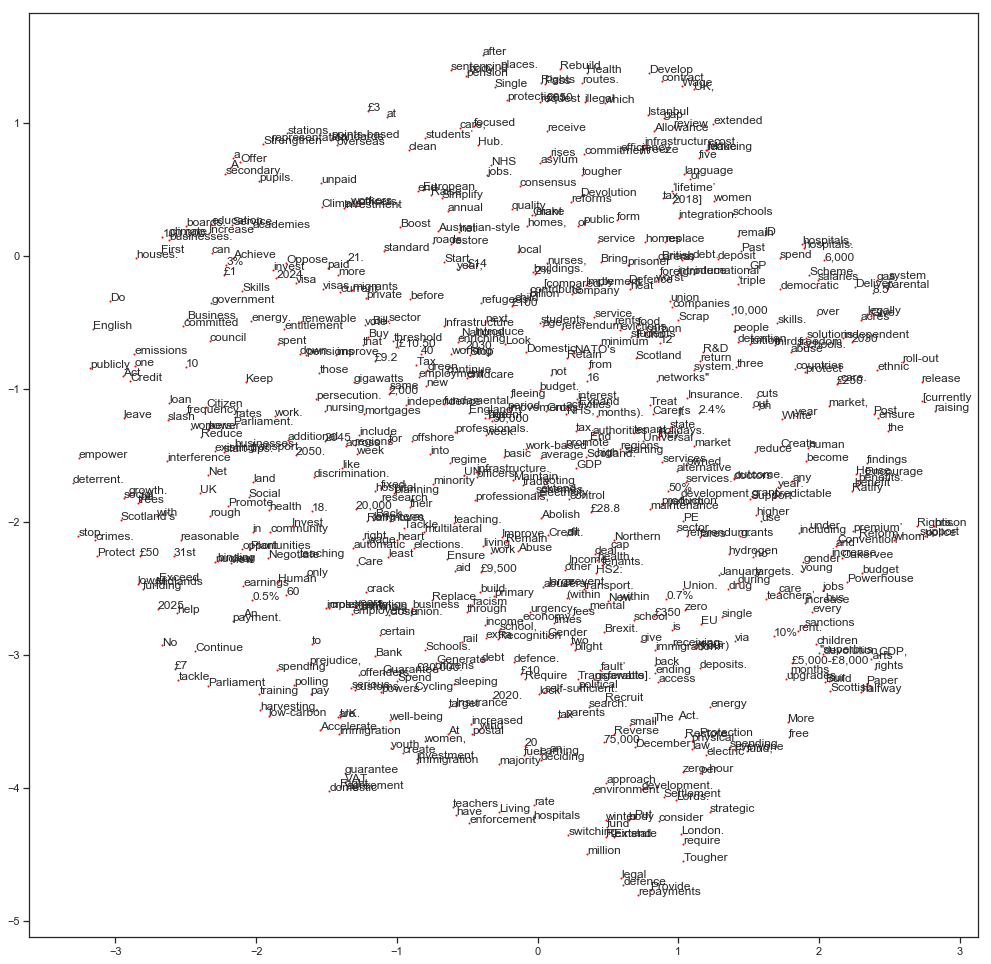

CPU times: user 7.26 s, sys: 1.14 s, total: 8.41 s
Wall time: 6.53 s


In [9]:
%%time
word_vectors = [spin_w2v[w] for w in spin_w2v.wv.vocab]
labels = [w for w in spin_w2v.wv.vocab]
_umap = umap.UMAP(n_components=2, n_neighbors=5).fit_transform(word_vectors)
x = _umap[:, 0]
y = _umap[:, 1]

plt.scatter(x, y, marker='o', s=1, facecolor='red', label=labels)
for _x, _y, label in zip(x, y, labels):
    plt.text(_x, _y, label, size=12)
plt.show();